## Advanced pygplates plotting examples

This notebook contains examples of python code that takes gplates-readable input files, makes reconstructions, and makes visualisations with different tools

   - GMT
   - Python tools to make animations
   
In the first section, import pygplates and reconstruct coastlines and static polygons, saving the output to GMT xy format.


In [1]:
import pygplates

# Names of input files
input_coastlines_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_static_polygons_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_StaticPolygons_2012.1.gpmlz'
input_rotation_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_2012.1.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 200

# Name of ouput file
output_static_polygons_filename = '/Users/Simon/temp/static_polygons.xy'
output_coastlines_filename = '/Users/Simon/temp/coastlines.xy'

# Use pygplates to carry out the reconstruction 
pygplates.reconstruct(input_coastlines_filename, input_rotation_filename, output_coastlines_filename, reconstruction_time)
pygplates.reconstruct(input_static_polygons_filename, input_rotation_filename, output_static_polygons_filename, reconstruction_time)


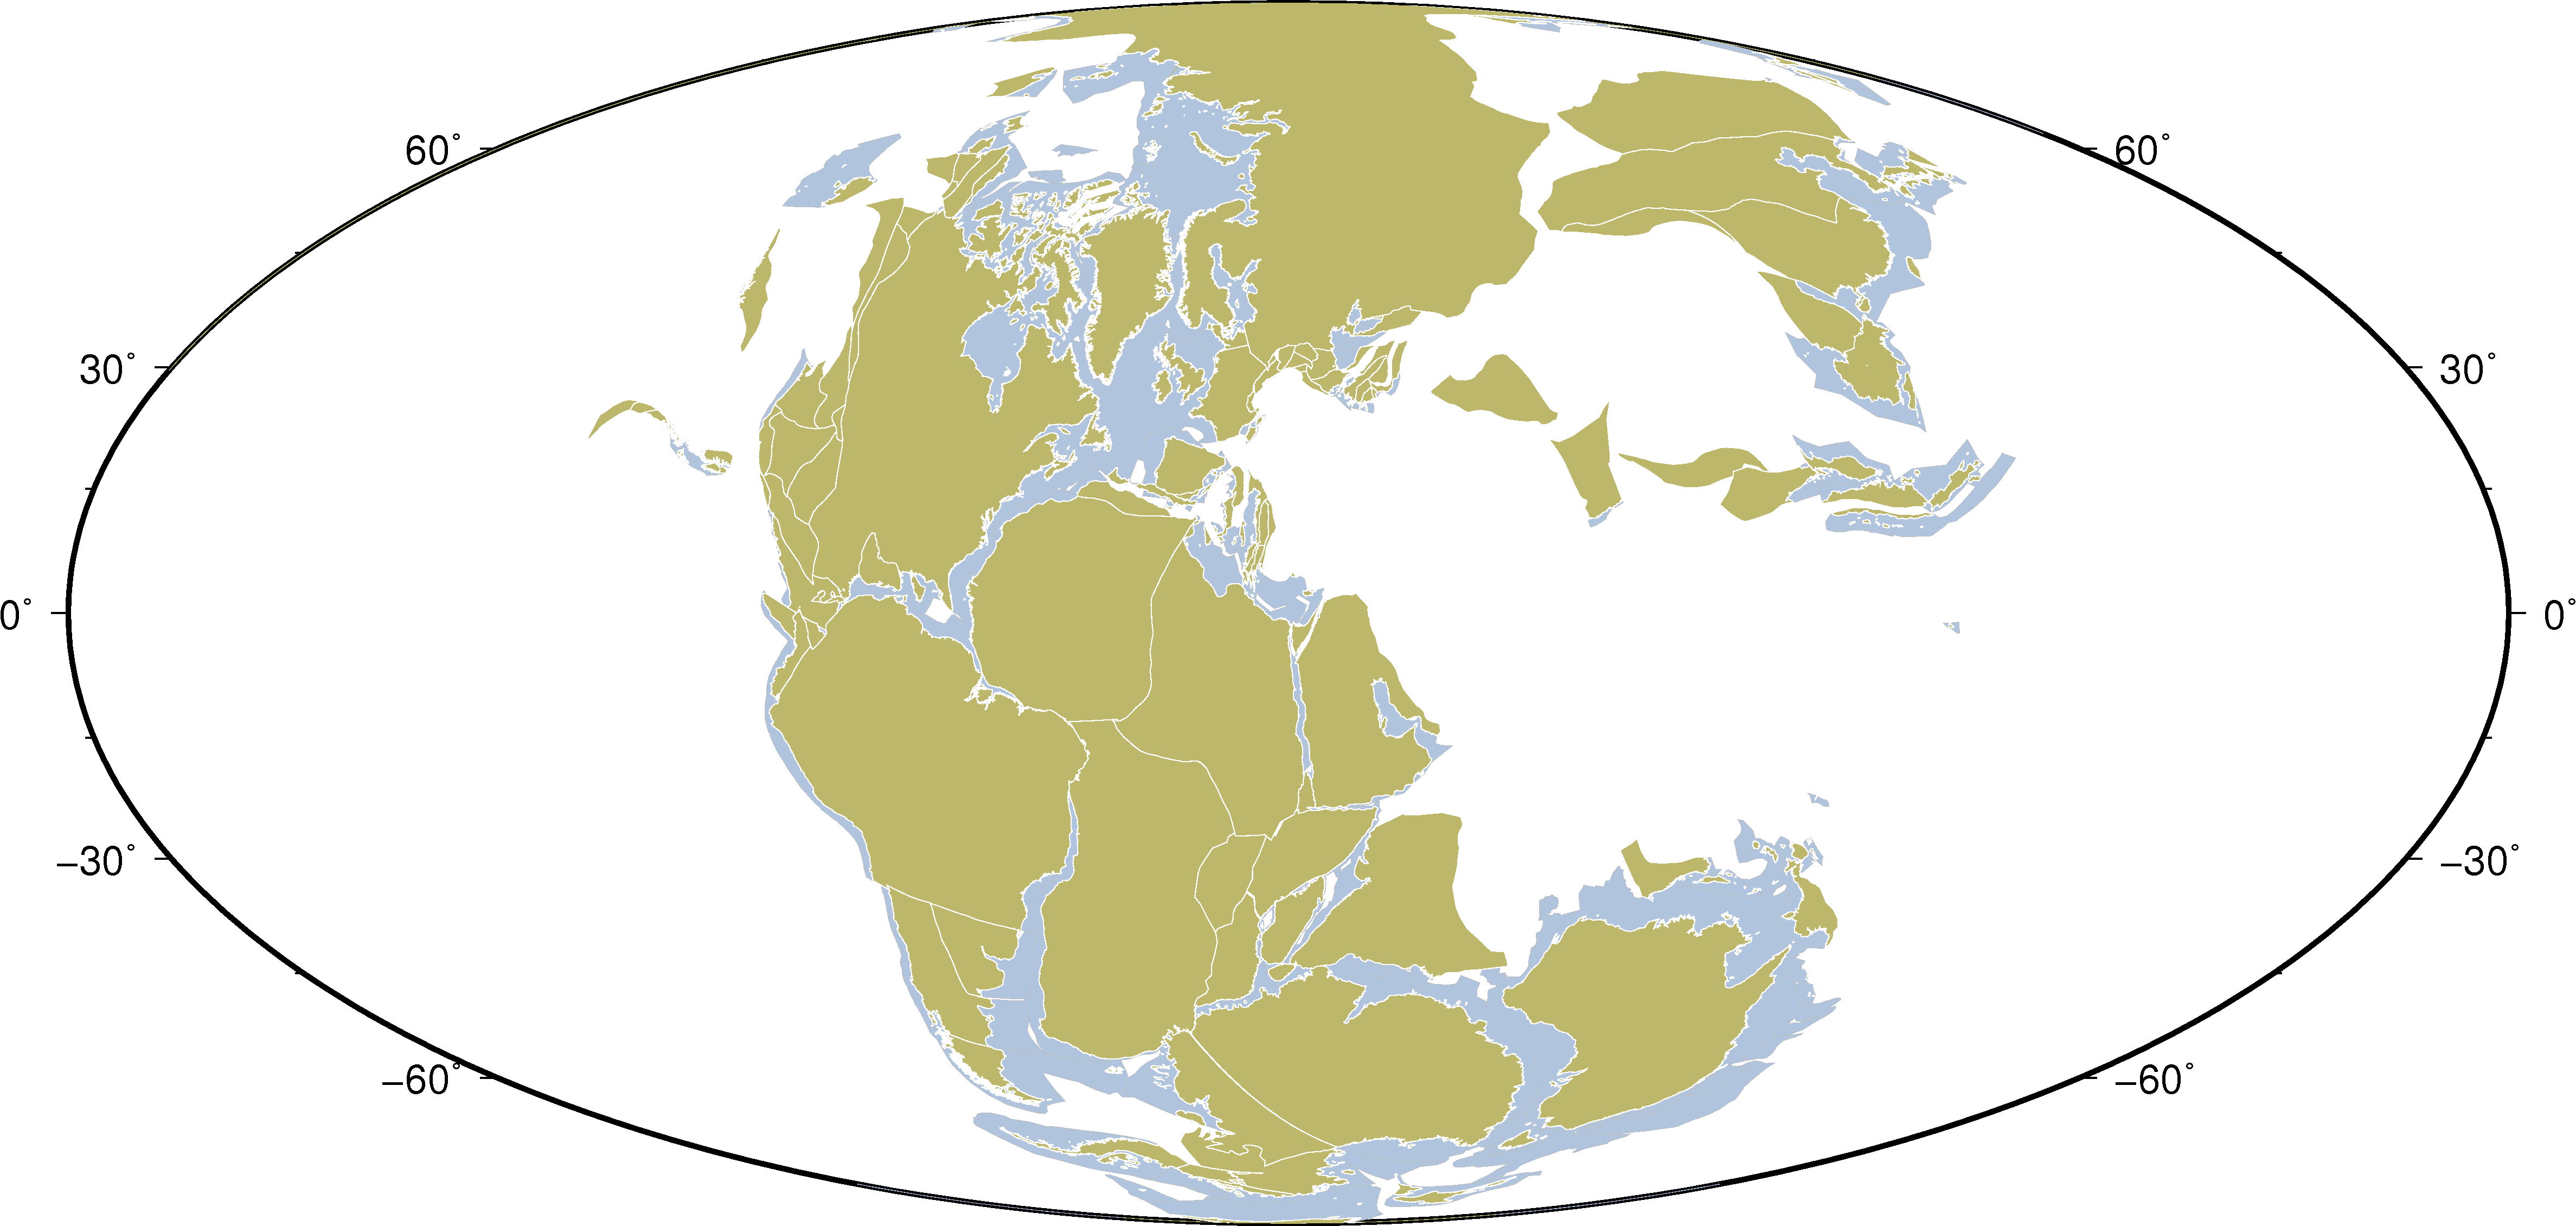

In [2]:
import os
from IPython.display import Image

outfile='/Users/Simon/temp/gmtplot.ps'

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW30/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba90f30/a30f15 -K > %s ' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,gray -Glightsteelblue ~/temp/static_polygons.xy -O -K -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.2p,white -Gdarkkhaki ~/temp/coastlines.xy -O -N >> %s' % (proj,outfile))
os.system('gmt ps2raster %s -A -E450 -Tg -P' % outfile)

Image('/Users/Simon/temp/gmtplot.png')


An animation file can be made directly from Python using basemap and matplotlib animation functions. The code below makes a gif file.

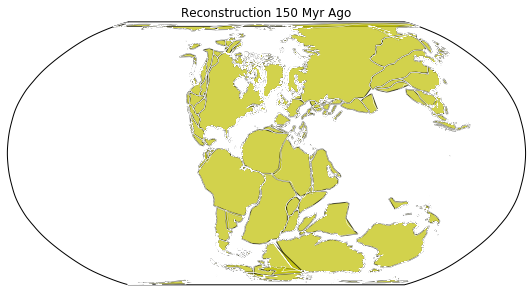

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib import animation

%matplotlib inline

# Names of input files
input_feature_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_rotation_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_2012.1.rot'

# Name of ouput file
output_reconstructed_feature_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/tmp/tmp.shp'

with plt.xkcd():
    fig = plt.figure(figsize=(8,5))
    ax_map = fig.add_axes([0,0,0.9,1.0])
    m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)
    m.drawmapboundary(fill_color='white')

    Nframes = 31

    def animate(nframe):
        ax_map.cla()
        reconstruction_time = 150-(nframe*5)
        pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate_id=0)

        shp_info = m.readshapefile('/Users/Simon/GIT/pygplates-alpha/tutorials-sv/tmp/tmp','shp',drawbounds=True,color='w')

        for nshape,seg in enumerate(m.shp):
            poly = Polygon(seg[::5],facecolor='y',edgecolor='k',alpha=0.7)
            ax_map.add_patch(poly)
        plt.title('Reconstruction %s Myr Ago' % reconstruction_time)

    anim = animation.FuncAnimation(fig, animate,
                                   frames=Nframes, interval=250)

    anim.save('PlateReconstruction.gif', writer='imagemagick')


In [17]:
from IPython.display import Image
Image(url='./PlateReconstruction.gif')

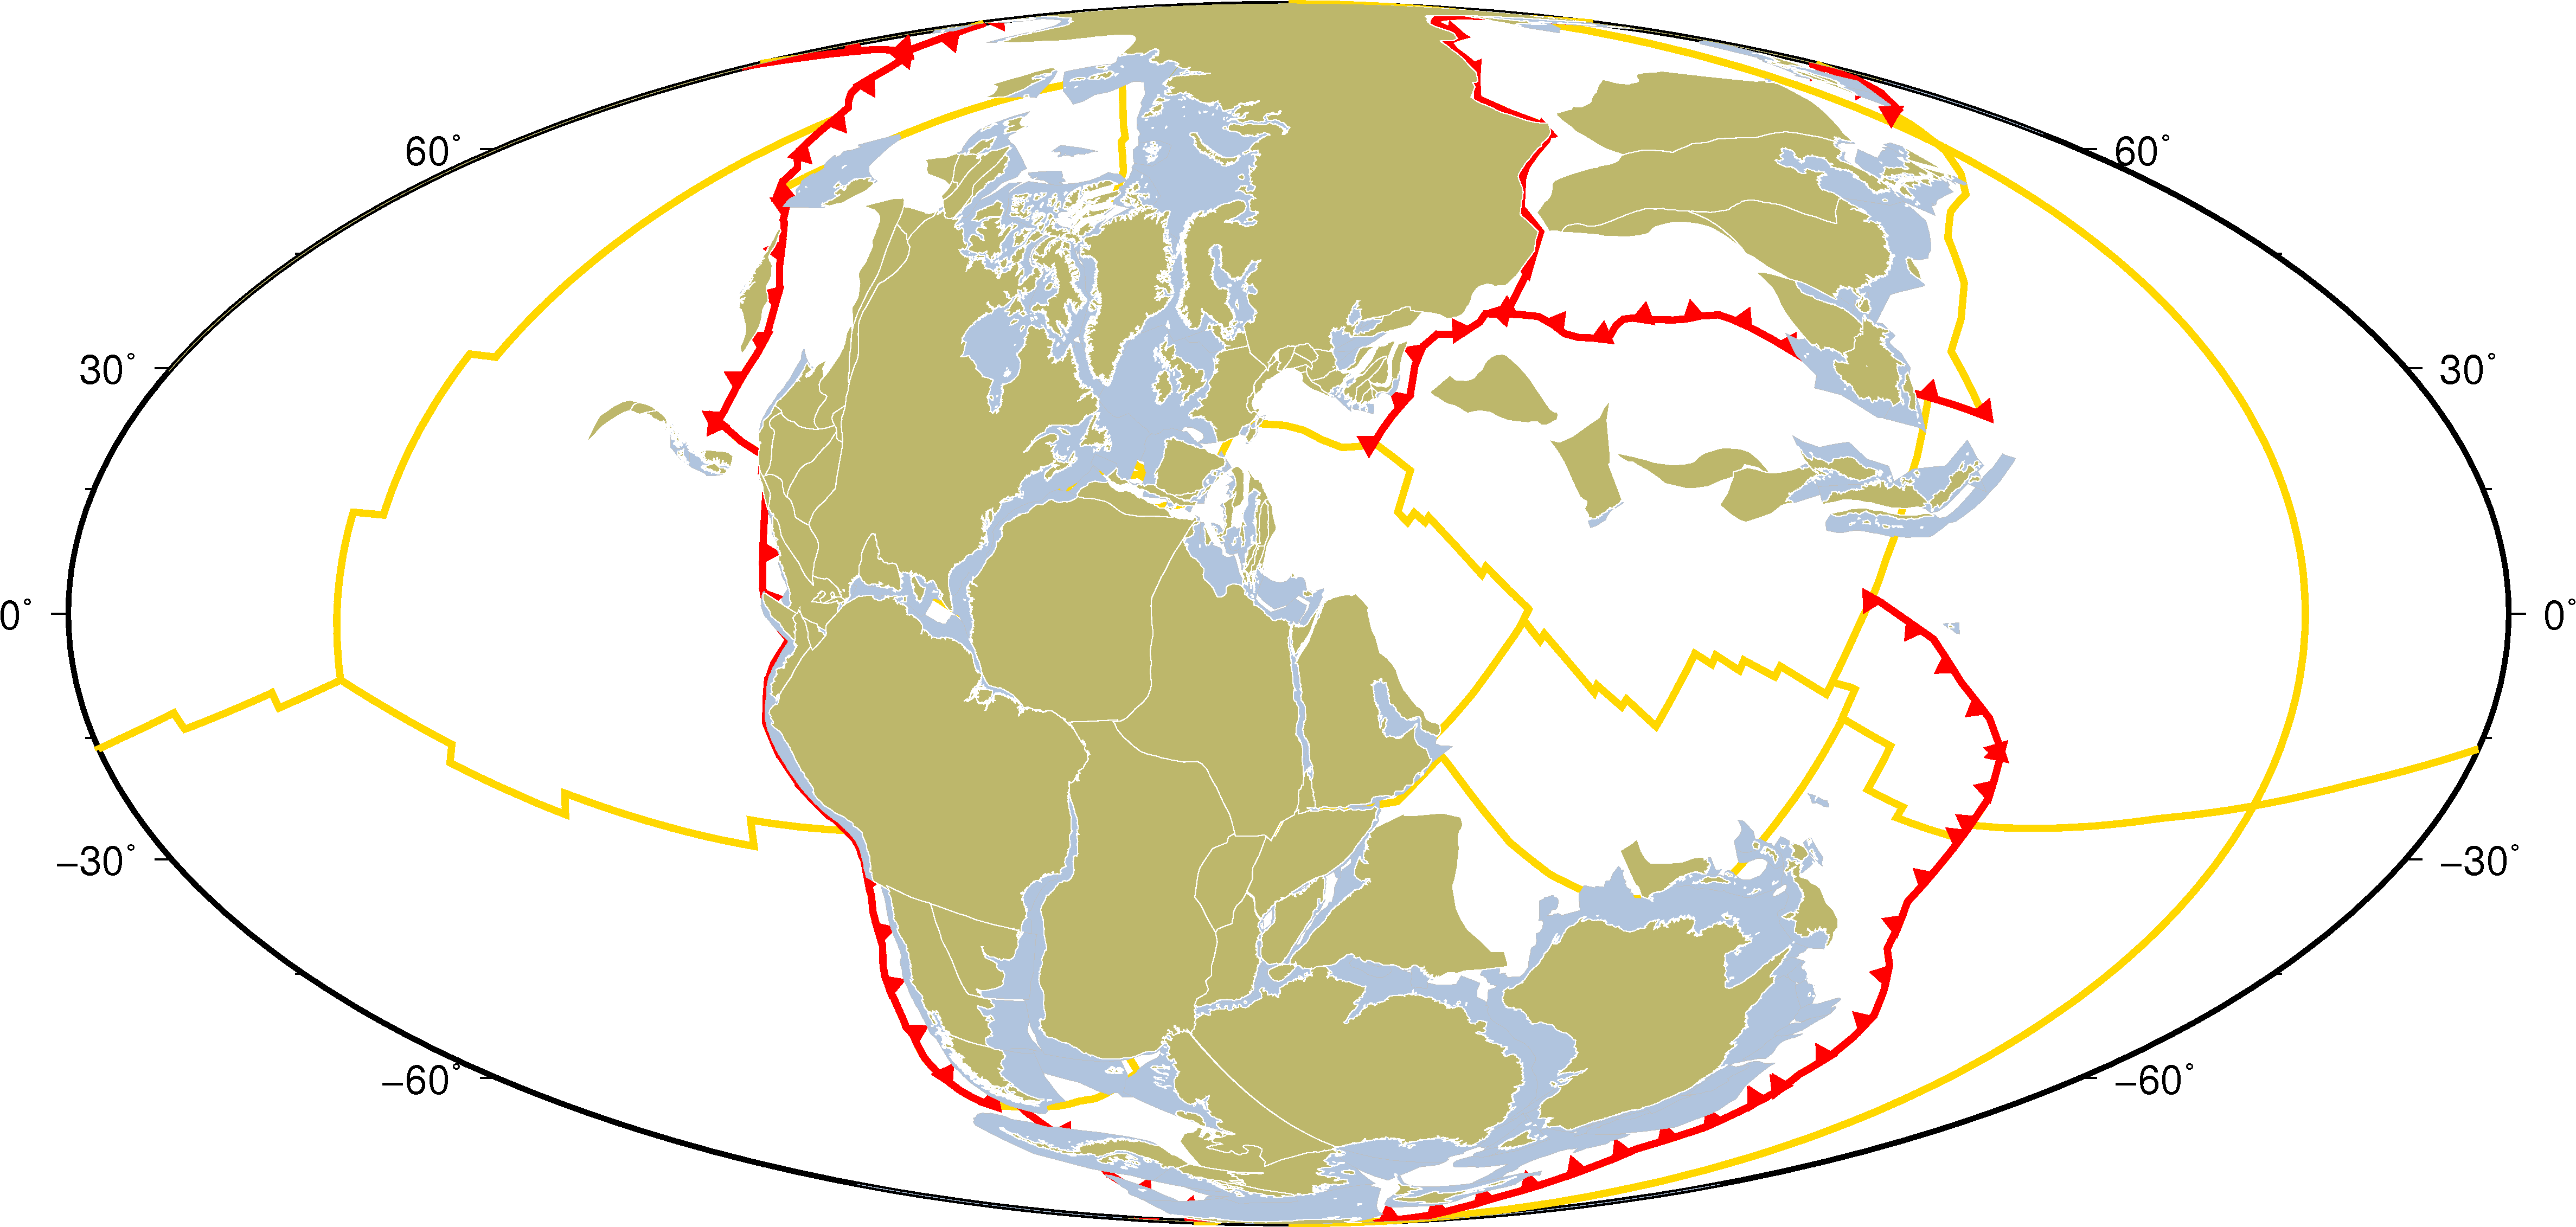

In [28]:
from resolve_topologies import resolve_topologies as topology2gmt

input_topology_filename = '/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_PP_2012.1.gpmlz'
reconstruction_time = 200
output_filename_prefix = ''
output_filename_extension = 'gmt'

topology2gmt(input_rotation_filename, 
             input_topology_filename, 
             reconstruction_time, 
             output_filename_prefix, 
             output_filename_extension, 
             0)


outfile='/Users/Simon/temp/gmtplot.ps'

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW30/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba90f30/a30f15 -K > %s ' % (proj,outfile))

os.system('gmt psxy -Rg %s -W2.0p,gold -K -O -m boundary_polygons_%0.2fMa.gmt -V >> %s' % (proj,reconstruction_time,outfile))

os.system('gmt psxy -Rg %s -W2.0p,red -Sf15p/4plt -K -O -m subduction_boundaries_sL_%0.2fMa.gmt -Gred -V >> %s' % (proj,reconstruction_time,outfile))
os.system('gmt psxy -Rg %s -W2.0p,red -Sf15p/4prt -O -K -m subduction_boundaries_sR_%0.2fMa.gmt -Gred -V >> %s' % (proj,reconstruction_time,outfile))

os.system('gmt psxy -Rg %s -W0.1p,gray -Glightsteelblue ~/temp/static_polygons.xy -O -K -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.2p,white -Gdarkkhaki ~/temp/coastlines.xy -O -N >> %s' % (proj,outfile))


os.system('gmt ps2raster %s -A -E450 -Tg -P' % outfile)

Image('/Users/Simon/temp/gmtplot.png')


